In [136]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Lambda
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Train: X=(30000, 28, 28), y=(30000, 10)
Valid: X=(30000, 28, 28), y=(30000, 10)
Test: X=(10000, 28, 28), y=(10000, 10)


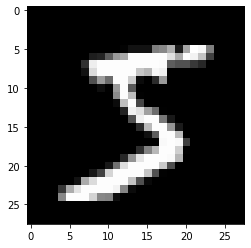

In [137]:
batch_size = 128
num_classes = 10
epochs = 5

# Loading the data
(trainX, trainy), (testX, testy) = mnist.load_data()
 
# One hot encode labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Separate half of the training data for validation
validX, validy = trainX[-30000:],trainy[-30000:]
trainX, trainy = trainX[:-30000],trainy[:-30000]

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Valid: X=%s, y=%s' % (validX.shape, validy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# Plotting the first image
plt.imshow(trainX[0], cmap='gray')

In [138]:
def generator(samples, batch_size):
    y = samples[1]
    x = samples[0]
    num_samples = len(samples)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_x = x[offset:offset+batch_size]
            batch_y = y[offset:offset+batch_size]

            X_train = np.array(batch_x)
            y_train = np.array(batch_y)
            yield np.array(X_train), np.array(y_train)

In [139]:
trainX, trainy = shuffle(trainX, trainy)
validX, validy = shuffle(validX, validy)

train_generator = generator((trainX, trainy), batch_size=batch_size)
validation_generator = generator((validX, validy), batch_size=batch_size)

# Defining model
model = Sequential()
model.add(Lambda(lambda x:x / 255.0 - 0.5, input_shape=(28,28,1)))
model.add(Conv2D(32,3,3, activation='relu'))
model.add(Dropout(0.6)) 
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(10))
model.compile(loss='mse', optimizer='adam')

model.fit_generator(train_generator, steps_per_epoch=math.floor(len(trainX)/batch_size)\
                    , validation_data=validation_generator, \
                    validation_steps=math.floor(len(validX)/batch_size), \
                    epochs=4, verbose=1, callbacks=[EarlyStopping(verbose=1)])

model.save('model.h5')

Epoch 1/4
234/234 [==============================] - 1s 4ms/step - loss: 0.0452 - val_loss: 0.0542
Epoch 2/4
234/234 [==============================] - 1s 4ms/step - loss: 0.0264 - val_loss: 0.0528
Epoch 3/4
234/234 [==============================] - 1s 5ms/step - loss: 0.0234 - val_loss: 0.0514
Epoch 4/4
234/234 [==============================] - 1s 4ms/step - loss: 0.0219 - val_loss: 0.0507


Image number 1
Prediction: 7
Actual:     7

Image number 2
Prediction: 2
Actual:     2

Image number 3
Prediction: 1
Actual:     1

Image number 4
Prediction: 0
Actual:     0

Image number 5
Prediction: 4
Actual:     4

Image number 6
Prediction: 1
Actual:     1



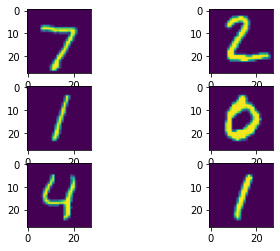

In [140]:
# Loading saved model
model = load_model('model.h5')
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
predictions = model.predict(testX)  # Making predictions

fig = plt.figure()

for i in range(6):
  index_to_predict = i
  print('Image number %d' % (i+1))
  print('Prediction: %d' % (np.argmax(predictions[index_to_predict])))
  print('Actual:     %d\n' % (np.argmax(testy[index_to_predict])))
  vals = testX[index_to_predict].reshape(28, 28)
  ax = fig.add_subplot(3,2,i+1)
  ax.imshow(vals)

In [141]:
# Testing accuracy of model with new images
print("Evaluate on test data")
results = model.evaluate(testX, testy, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.7547
test loss, test acc: [0.18258118629455566, 0.7547000050544739]
